In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
os.makedirs("", exist_ok=True)

In [40]:
k_AB, k_BA = sp.symbols('k_AB k_BA')
k_BC, k_CB = sp.symbols('k_BC k_CB')
k_CA, k_AC = sp.symbols('k_CA k_AC')
k_DA, k_AD = sp.symbols('k_DA k_AD')
#pA, pB, pC = 0.5, 0.3, 0.2
pA, pB, pC, pD = sp.symbols('pA pB pC pD')
R = 8.314 #J/molK
T = sp.symbols('T')

In [41]:
def arrhenius_eq(A, E):
    return A*sp.exp(-E/(R*T))

In [42]:
E_AB, E_BA, E_AC, E_CA, E_CB, E_BC = sp.symbols("E_AB, E_BA, E_AC, E_CA, E_CB, E_BC")
A_AB, A_BA, A_AC, A_CA, A_CB, A_BC = sp.symbols("A_AB, A_BA, A_AC, A_CA, A_CB, A_BC")

In [43]:
eq_k1 = sp.Eq(k_AB, arrhenius_eq(A_AB, E_AB))
eq_k2 = sp.Eq(k_BA, arrhenius_eq(A_BA, E_BA))
eq_k3 = sp.Eq(k_AC, arrhenius_eq(A_AC, E_AC))
eq_k4 = sp.Eq(k_CB, arrhenius_eq(A_CB, E_CB))
eq_k5 = sp.Eq(k_CA, arrhenius_eq(A_CA, E_CA))
eq_k6 = sp.Eq(k_BC, arrhenius_eq(A_BC, E_BC))

In [44]:
eq1 = sp.Eq(-(k_AB + k_AC) * pA + k_BA * pB + k_CA * pC, 0)
eq2 = sp.Eq(-(k_BA + k_BC) * pB + k_AB * pA + k_CB * pC, 0)
eq3 = sp.Eq(-(k_CA + k_CB) * pC + k_AC * pA + k_BC * pB, 0)
eq4 = sp.Eq(pA+pB+pC, 1)

In [45]:
sp.init_printing(use_latex='mathjax')
for eq in [eq1, eq2, eq3, eq4, eq_k1, eq_k2, eq_k3, eq_k4, eq_k5, eq_k6]:
    display(eq)

k_BA⋅pB + k_CA⋅pC + pA⋅(-k_AB - k_AC) = 0

k_AB⋅pA + k_CB⋅pC + pB⋅(-k_BA - k_BC) = 0

k_AC⋅pA + k_BC⋅pB + pC⋅(-k_CA - k_CB) = 0

pA + pB + pC = 1

             -0.120279047389945⋅E_AB 
             ────────────────────────
                        T            
k_AB = A_AB⋅ℯ                        

             -0.120279047389945⋅E_BA 
             ────────────────────────
                        T            
k_BA = A_BA⋅ℯ                        

             -0.120279047389945⋅E_AC 
             ────────────────────────
                        T            
k_AC = A_AC⋅ℯ                        

             -0.120279047389945⋅E_CB 
             ────────────────────────
                        T            
k_CB = A_CB⋅ℯ                        

             -0.120279047389945⋅E_CA 
             ────────────────────────
                        T            
k_CA = A_CA⋅ℯ                        

             -0.120279047389945⋅E_BC 
             ────────────────────────
                        T            
k_BC = A_BC⋅ℯ                        

In [46]:
solution = sp.solve(
    [eq1, eq2, eq3, eq4,
     eq_k1, eq_k2, eq_k3, eq_k4, eq_k5, eq_k6
     ],
    [pA, pB, pC],
    dict=True
)

In [47]:
solution

⎡⎧                                        k_BA⋅k_CA + k_BA⋅k_CB + k_BC⋅k_CA    ↪
⎢⎨pA: ──────────────────────────────────────────────────────────────────────── ↪
⎣⎩    k_AB⋅k_BC + k_AB⋅k_CA + k_AB⋅k_CB + k_AC⋅k_BA + k_AC⋅k_BC + k_AC⋅k_CB +  ↪

↪                                                                            k ↪
↪ ─────────────────────────────────, pB: ───────────────────────────────────── ↪
↪ k_BA⋅k_CA + k_BA⋅k_CB + k_BC⋅k_CA      k_AB⋅k_BC + k_AB⋅k_CA + k_AB⋅k_CB + k ↪

↪ _AB⋅k_CA + k_AB⋅k_CB + k_AC⋅k_CB                                             ↪
↪ ────────────────────────────────────────────────────────────────────, pC: ── ↪
↪ _AC⋅k_BA + k_AC⋅k_BC + k_AC⋅k_CB + k_BA⋅k_CA + k_BA⋅k_CB + k_BC⋅k_CA      k_ ↪

↪                                   k_AB⋅k_BC + k_AC⋅k_BA + k_AC⋅k_BC          ↪
↪ ──────────────────────────────────────────────────────────────────────────── ↪
↪ AB⋅k_BC + k_AB⋅k_CA + k_AB⋅k_CB + k_AC⋅k_BA + k_AC⋅k_BC + k_AC⋅k_CB + k_BA⋅k ↪

↪                       

In [48]:
for key in solution[0].keys():
    display(solution[0][key])

                                    k_BA⋅k_CA + k_BA⋅k_CB + k_BC⋅k_CA          ↪
────────────────────────────────────────────────────────────────────────────── ↪
k_AB⋅k_BC + k_AB⋅k_CA + k_AB⋅k_CB + k_AC⋅k_BA + k_AC⋅k_BC + k_AC⋅k_CB + k_BA⋅k ↪

↪                            
↪ ───────────────────────────
↪ _CA + k_BA⋅k_CB + k_BC⋅k_CA

                                    k_AB⋅k_CA + k_AB⋅k_CB + k_AC⋅k_CB          ↪
────────────────────────────────────────────────────────────────────────────── ↪
k_AB⋅k_BC + k_AB⋅k_CA + k_AB⋅k_CB + k_AC⋅k_BA + k_AC⋅k_BC + k_AC⋅k_CB + k_BA⋅k ↪

↪                            
↪ ───────────────────────────
↪ _CA + k_BA⋅k_CB + k_BC⋅k_CA

                                    k_AB⋅k_BC + k_AC⋅k_BA + k_AC⋅k_BC          ↪
────────────────────────────────────────────────────────────────────────────── ↪
k_AB⋅k_BC + k_AB⋅k_CA + k_AB⋅k_CB + k_AC⋅k_BA + k_AC⋅k_BC + k_AC⋅k_CB + k_BA⋅k ↪

↪                            
↪ ───────────────────────────
↪ _CA + k_BA⋅k_CB + k_BC⋅k_CA

In [49]:
sol_k = sp.solve([eq1, eq2, eq3, eq4], [pA, pB, pC], dict=True)[0]

# Substitution der k's
subs_dict = {
    k_AB: arrhenius_eq(A_AB, E_AB),
    k_BA: arrhenius_eq(A_BA, E_BA),
    k_AC: arrhenius_eq(A_AC, E_AC),
    k_CB: arrhenius_eq(A_CB, E_CB),
    k_CA: arrhenius_eq(A_CA, E_CA),
    k_BC: arrhenius_eq(A_BC, E_BC),
}

sol_full = {var: expr.subs(subs_dict) for var, expr in sol_k.items()}
sol_full_str = {str(var): expr for var, expr in sol_full.items()}


In [50]:
sol_full

⎧                                                                              ↪
⎪                                                                              ↪
⎪                                                                              ↪
⎪                                                                              ↪
⎨pA: ───────────────────────────────────────────────────────────────────────── ↪
⎪               -0.120279047389945⋅E_AB   -0.120279047389945⋅E_BC              ↪
⎪               ────────────────────────  ────────────────────────             ↪
⎪                          T                         T                         ↪
⎩    A_AB⋅A_BC⋅ℯ                        ⋅ℯ                         + A_AB⋅A_CA ↪

↪                                                                              ↪
↪                                                                              ↪
↪                                                                              ↪
↪                          

In [51]:
pA = solution[0][pA]
pB = solution[0][pB]
pC = solution[0][pC]


In [52]:
sol_full_str["pA"]

                                                                               ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪
────────────────────────────────────────────────────────────────────────────── ↪
           -0.120279047389945⋅E_AB   -0.120279047389945⋅E_BC               -0. ↪
           ────────────────────────  ────────────────────────              ─── ↪
                      T                         T                              ↪
A_AB⋅A_BC⋅ℯ                        ⋅ℯ                         + A_AB⋅A_CA⋅ℯ    ↪

↪                                                                              ↪
↪                                                                              ↪
↪                                                                              ↪
↪                          

<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in divide
  return (A_BA*A_CA*exp(-0.120279047389945*E_BA/T)*exp(-0.120279047389945*E_CA/T) + A_BA*A_CB*exp(-0.120279047389945*E_BA/T)*exp(-0.120279047389945*E_CB/T) + A_BC*A_CA*exp(-0.120279047389945*E_BC/T)*exp(-0.120279047389945*E_CA/T))/(A_AB*A_BC*exp(-0.120279047389945*E_AB/T)*exp(-0.120279047389945*E_BC/T) + A_AB*A_CA*exp(-0.120279047389945*E_AB/T)*exp(-0.120279047389945*E_CA/T) + A_AB*A_CB*exp(-0.120279047389945*E_AB/T)*exp(-0.120279047389945*E_CB/T) + A_AC*A_BA*exp(-0.120279047389945*E_AC/T)*exp(-0.120279047389945*E_BA/T) + A_AC*A_BC*exp(-0.120279047389945*E_AC/T)*exp(-0.120279047389945*E_BC/T) + A_AC*A_CB*exp(-0.120279047389945*E_AC/T)*exp(-0.120279047389945*E_CB/T) + A_BA*A_CA*exp(-0.120279047389945*E_BA/T)*exp(-0.120279047389945*E_CA/T) + A_BA*A_CB*exp(-0.120279047389945*E_BA/T)*exp(-0.120279047389945*E_CB/T) + A_BC*A_CA*exp(-0.120279047389945*E_BC/T)*exp(-0.120279047389945*E_CA/T))
<lambdifygenerated-12>:2:

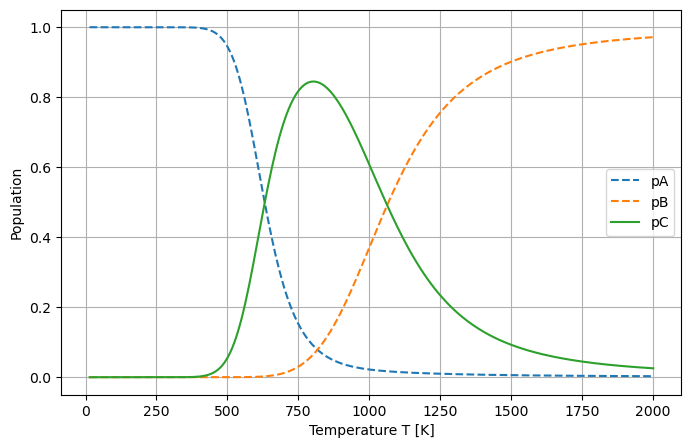

In [53]:
pA, pB, pC, pD = sp.symbols('pA pB pC pD')
params = {'A_AB': 276508612902.2001, 'E_AB': 83998.09748484963,
          'A_BA': 56521352245.95339, 'E_BA': 46231.11739390362,
          'A_AC': 186185139349762.75, 'E_AC': 84139.31671292715,
          'A_CB': 182431516306948.3, 'E_CB': 108146.95944234288,
          'A_CA': 3780104505.0344687, 'E_CA': 27422.12876765839,
          'A_BC': 29504122221.516895, 'E_BC': 34717.69180635105}

# Sympy → NumPy Funktionen
f_pA = sp.lambdify((T, *params.keys()), sol_full[pA], 'numpy')
f_pB = sp.lambdify((T, *params.keys()), sol_full[pB], 'numpy')
f_pC = sp.lambdify((T, *params.keys()), sol_full[pC], 'numpy')

# Temperaturbereich
T_vals = np.linspace(1, 2000, 300)

# Evaluation
pA_vals = f_pA(T_vals, *params.values())
pB_vals = f_pB(T_vals, *params.values())
pC_vals = f_pC(T_vals, *params.values())

# Plot
plt.figure(figsize=(8,5))
plt.plot(T_vals, pA_vals, "--",label="pA")
plt.plot(T_vals, pB_vals, "--",label="pB")
plt.plot(T_vals, pC_vals, label="pC")
plt.xlabel("Temperature T [K]")
plt.ylabel("Population")
#plt.title("Stationäre Populationsverteilung")
plt.legend()
plt.grid(True)
plt.savefig("arrhenius_populations.png", format="png")
plt.show()

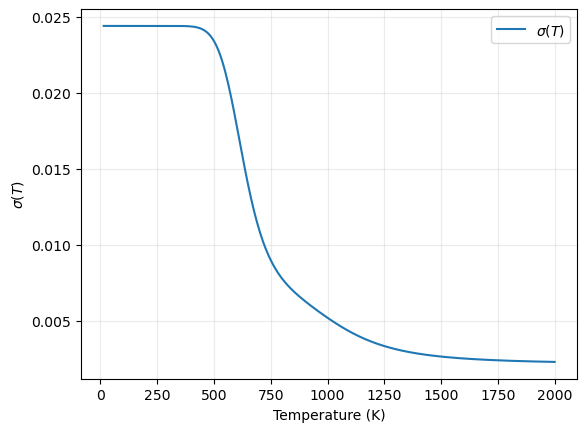

C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\881281564.py:18: RuntimeWarning: divide by zero encountered in divide
  K = ((sigT - sigB) / (sigA - sigT))


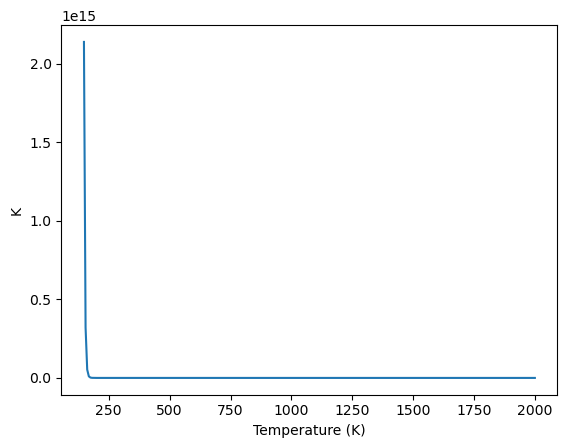

C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\881281564.py:30: RuntimeWarning: divide by zero encountered in divide
  plt.plot(T_vals, -R*T_vals*np.log(k_BA_lambd(T_vals)/k_AB_lambd(T_vals)), label=r"$k_{BA}/k_{AB}$")
C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\881281564.py:30: RuntimeWarning: invalid value encountered in divide
  plt.plot(T_vals, -R*T_vals*np.log(k_BA_lambd(T_vals)/k_AB_lambd(T_vals)), label=r"$k_{BA}/k_{AB}$")


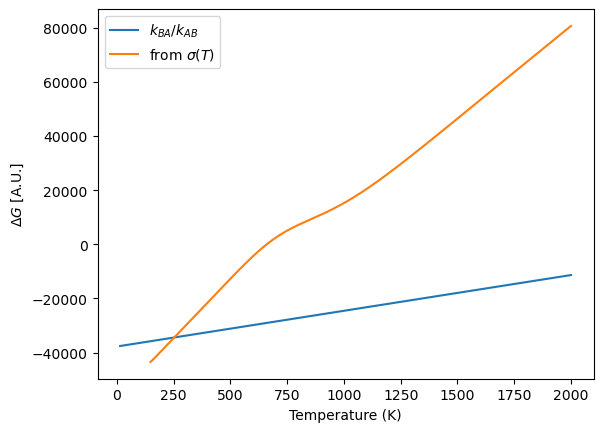

In [54]:
sigA = 1/(4*10**(-10))**6*10**(-58)
sigC = 1/(5*10**(-10))**6*10**(-58)
sigB = 1/(6*10**(-10))**6*10**(-58)

assert sigA > sigC > sigB

sigT = (pA_vals*sigA+pB_vals*sigB+pC_vals*sigC)

plt.plot(T_vals, sigT, label=r"$\sigma(T)$")
plt.xlabel('Temperature (K)')
plt.ylabel(r"$\sigma(T)$")
plt.legend(loc='best')
plt.grid(alpha=0.25)
plt.savefig("sigT.png", format="png")
plt.show()


K = ((sigT - sigB) / (sigA - sigT))
K_3 = K

plt.plot(T_vals, K_3)
plt.xlabel('Temperature (K)')
plt.ylabel(r'K')
plt.savefig("K_3.png", format="png")
plt.show()

k_AB_lambd = sp.lambdify(T,arrhenius_eq(params["A_AB"], params["E_AB"]))
k_BA_lambd = sp.lambdify(T,arrhenius_eq(params["A_BA"], params["E_BA"]))

plt.plot(T_vals, -R*T_vals*np.log(k_BA_lambd(T_vals)/k_AB_lambd(T_vals)), label=r"$k_{BA}/k_{AB}$")
plt.plot(T_vals, -R*T_vals*np.log(K_3), label=r"from $\sigma(T)$")
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\Delta G$ [A.U.]')
plt.savefig("G3.png", format="png")
plt.legend()
plt.show()


In [55]:
Z=pA_vals+pB_vals
pA_vals2state = pA_vals/Z
pB_vals2state = pB_vals/Z

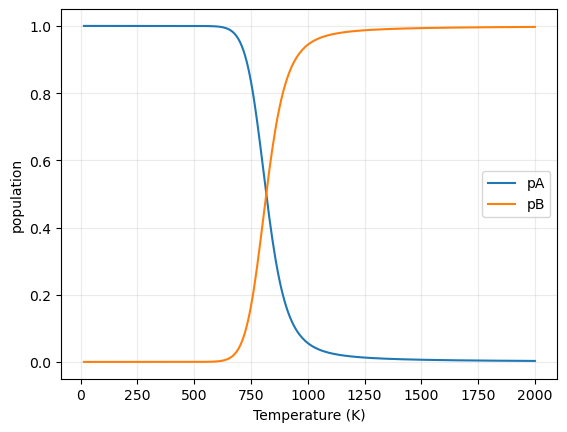

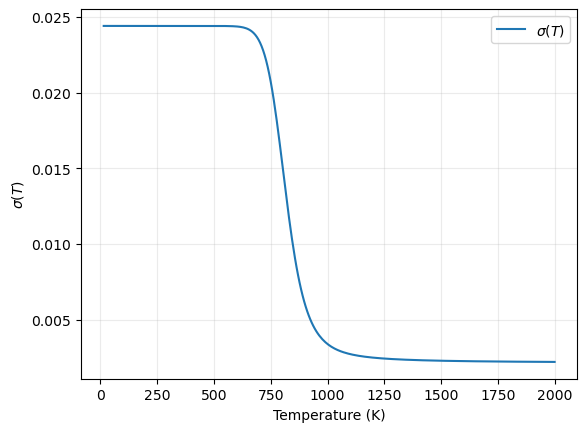

C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\1217018007.py:22: RuntimeWarning: divide by zero encountered in divide
  K = ((sigT - sigB) / (sigA - sigT))


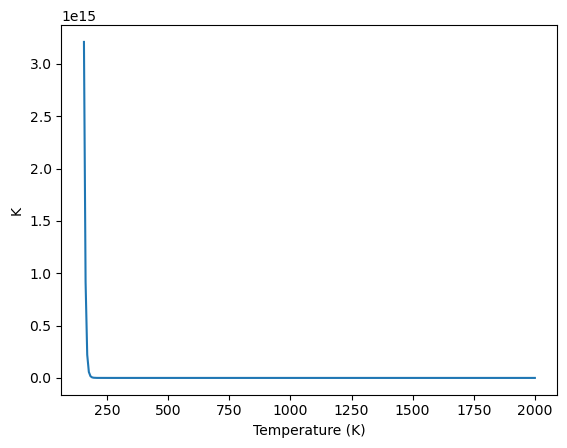

C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\1217018007.py:31: RuntimeWarning: divide by zero encountered in divide
  plt.plot(T_vals, -R*T_vals*np.log(k_BA_lambd(T_vals)/k_AB_lambd(T_vals)), label=r"$k_{BA}/k_{AB}$")
C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\1217018007.py:31: RuntimeWarning: invalid value encountered in divide
  plt.plot(T_vals, -R*T_vals*np.log(k_BA_lambd(T_vals)/k_AB_lambd(T_vals)), label=r"$k_{BA}/k_{AB}$")


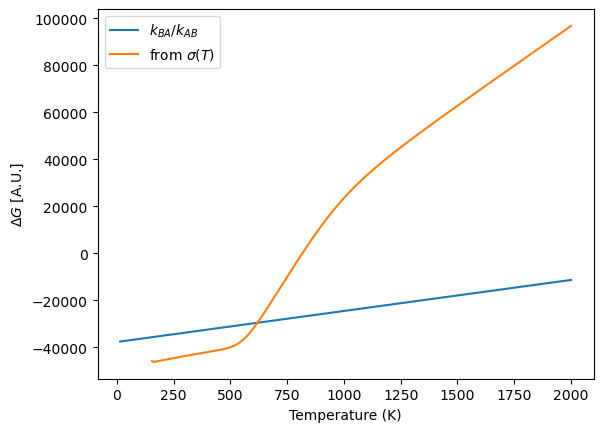

In [59]:
sigT = (pA_vals2state*sigA+pB_vals2state*sigB)

plt.plot(T_vals, pA_vals2state, label=r"pA")
plt.plot(T_vals, pB_vals2state, label=r"pB")
plt.xlabel('Temperature (K)')
plt.ylabel(r"population")
plt.legend(loc='best')
plt.grid(alpha=0.25)
plt.savefig("populations2state.png", format="png")
plt.show()


plt.plot(T_vals, sigT, label=r"$\sigma(T)$")
plt.xlabel('Temperature (K)')
plt.ylabel(r"$\sigma(T)$")
plt.legend(loc='best')
plt.grid(alpha=0.25)
plt.savefig("sigT2state.png", format="png")
plt.show()


K = ((sigT - sigB) / (sigA - sigT))
K_2 = K

plt.plot(T_vals, K_2)
plt.xlabel('Temperature (K)')
plt.ylabel(r'K')
plt.savefig("K_2.png", format="png")
plt.show()

plt.plot(T_vals, -R*T_vals*np.log(k_BA_lambd(T_vals)/k_AB_lambd(T_vals)), label=r"$k_{BA}/k_{AB}$")
plt.plot(T_vals, -R*T_vals*np.log(K_2), label=r"from $\sigma(T)$")
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\Delta G$ [A.U.]')
plt.savefig("G2.png", format="png")
plt.legend()
plt.show()

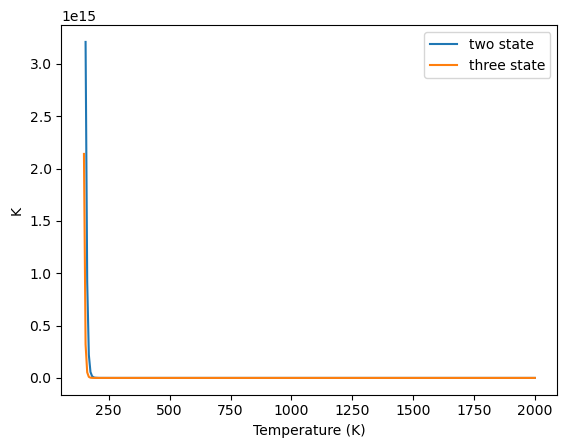

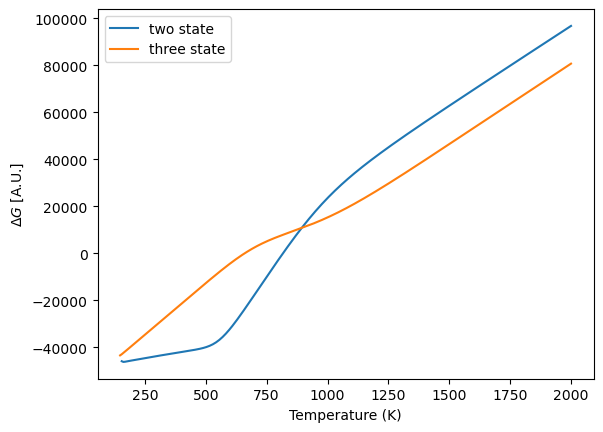

C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\1467648337.py:16: RuntimeWarning: invalid value encountered in add
  plt.plot(T_vals, (-R*T_vals*np.log(K_3)+R*T_vals*np.log(K_2))/(-R*T_vals*np.log(K_3)), label="relative error")


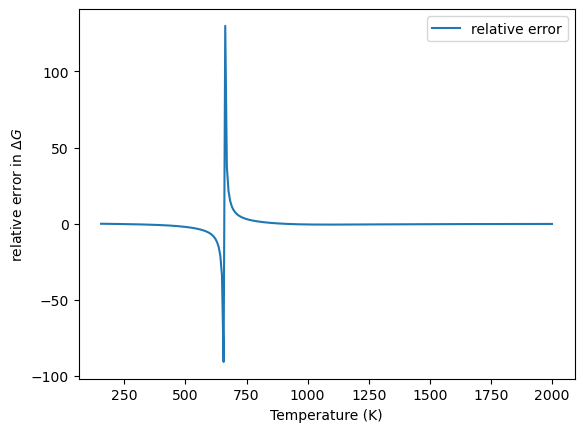

C:\Users\C9Wol\AppData\Local\Temp\ipykernel_6580\1467648337.py:25: RuntimeWarning: invalid value encountered in add
  plt.plot(T_vals, (-R*T_vals*np.log(K_3)+R*T_vals*np.log(K_2))/(-R*T_vals*np.log(K_3)), label="relative error")


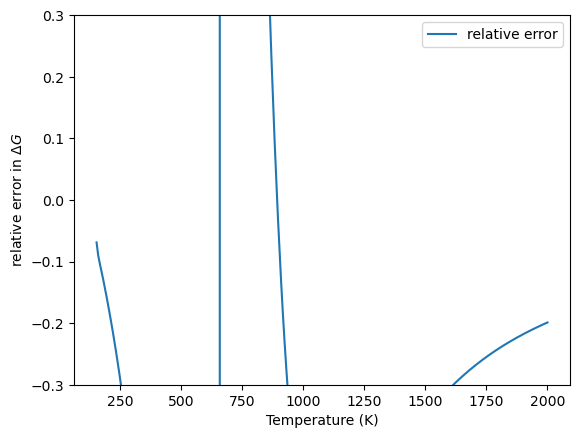

In [57]:
plt.plot(T_vals, K_2, label="two state")
plt.plot(T_vals, K_3, label="three state")
plt.xlabel('Temperature (K)')
plt.ylabel(r'K')
plt.legend()
plt.show()

plt.plot(T_vals, -R*T_vals*np.log(K_2), label="two state")
plt.plot(T_vals, -R*T_vals*np.log(K_3), label="three state")
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\Delta G$ [A.U.]')
plt.legend()
plt.savefig("G_comparison.png", format="png")
plt.show()

plt.plot(T_vals, (-R*T_vals*np.log(K_3)+R*T_vals*np.log(K_2))/(-R*T_vals*np.log(K_3)), label="relative error")

plt.xlabel('Temperature (K)')
plt.ylabel(r'relative error in $\Delta G$')
#plt.ylim(-0.3,0.3)
plt.legend()
plt.savefig("relative_error.png", format="png")
plt.show()

plt.plot(T_vals, (-R*T_vals*np.log(K_3)+R*T_vals*np.log(K_2))/(-R*T_vals*np.log(K_3)), label="relative error")

plt.xlabel('Temperature (K)')
plt.ylabel(r'relative error in $\Delta G$')
plt.ylim(-0.3,0.3)
plt.legend()
plt.savefig("relative_error_zoom.png", format="png")
plt.show()